# Supplementary plots & statistics


In [20]:
#Figure size global settings
def mm_to_inches(mm):
    return mm * 0.0393701
one_column = mm_to_inches(86)
two_column = mm_to_inches(178)
print(one_column, two_column)

3.3858286 7.007877799999999


### Distance distributions
Negative, positive and random interaction set distance distributions for all orthologies

In [19]:
import pandas as pd
file_dir = "./Results/Distances/"

sets = ["egg_distances_5pubID",\
        "egg_hmm_distances_5pubID_corrected",\
        "od_distances_5pubID",\
        "om3_distances_5pubID",\
        "panther_distances_5pubID_different",\
        "broccoli_distances_5pubID",\
        "sonicparanoid_sensitive_distances_5pubID",\
        "swiftortho_c50_distances_5pubID"]

random_set = ["egg_diamond_distances_random_set",\
              "egg_hmm_distances_random_set",\
              "ortho_diamond_distances_random_set",\
              "ortho_em3_distances_random_set",\
              "Panther_distances_random_set",\
              "broccoli_distances_random_set",\
              "sonicparanoid_sensitive_distances_random_set",\
              "swiftortho_c50_distances_random_set"]
              
data_dict1 = {}
for i in range(len(sets)):
    name = sets[i]
    name_rand = random_set[i]
    
    print(name, name_rand)
    #dataframes need to be concatenated (neg+pos and random)
    data_dict1[name] = pd.concat([pd.read_csv(file_dir+name, sep = "\t", index_col = False,\
                                               usecols=['pair', 'cosine', 'Interaction']).query('Interaction != "RusselNeg"'),\
                                   pd.read_csv(file_dir+name_rand, sep = "\t", index_col = False,\
                                               usecols=['pair', 'cosine', 'Interaction'])])

egg_distances_5pubID egg_diamond_distances_random_set
egg_hmm_distances_5pubID_corrected egg_hmm_distances_random_set
od_distances_5pubID ortho_diamond_distances_random_set
om3_distances_5pubID ortho_em3_distances_random_set
panther_distances_5pubID_different Panther_distances_random_set
broccoli_distances_5pubID broccoli_distances_random_set
sonicparanoid_sensitive_distances_5pubID sonicparanoid_sensitive_distances_random_set
swiftortho_c50_distances_5pubID swiftortho_c50_distances_random_set


In [21]:
#names to rename later when plotting
re_names_dist = {'egg_distances_5pubID': 'eggNOG DIAMOND',\
'egg_hmm_distances_5pubID_corrected': 'eggNOG hmm',\
'od_distances_5pubID': 'Orthofinder DIAMOND',\
'om3_distances_5pubID': 'Orthofinder BLAST',\
'panther_distances_5pubID_different': 'Ancestral Panther',\
'broccoli_distances_5pubID': 'Broccoli',\
'sonicparanoid_sensitive_distances_5pubID': 'SonicParanoid',\
'swiftortho_c50_distances_5pubID': 'SwiftOrtho'}

data_dict = {re_names_dist[k]: v for k, v in data_dict1.items()}


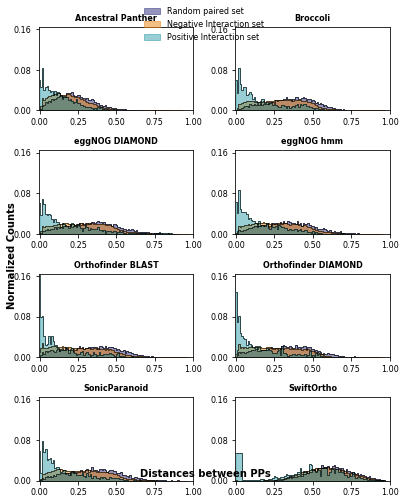

In [23]:
%matplotlib inline
import statistics as s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


labels = ['']

i = 0
fig = plt.figure(figsize = (0.8*two_column, two_column))

nrows = 4
ncols = 2

for ortho in sorted(data_dict.keys(), key=str.lower):
    i += 1 
    ax = fig.add_subplot(nrows,ncols,i)
    df = data_dict[ortho]
    dists_C = round(df[df.Interaction == 'RandomSet'].loc[:,'cosine'],2)
    dcr = dists_C.value_counts().sort_index() #count per distance and sort on distance (index)
    dcrd = pd.DataFrame({'Distance': dcr.index, 'Counts': dcr.values}) #make df to work with
    ax.step(dcrd.loc[:,'Distance'], dcrd.loc[:,'Counts']/sum(dcrd.loc[:,'Counts']), where = 'mid',\
            color = "black", alpha = 0.6, linewidth = 1)#, alpha = 0.4, edgecolor = "black")
    ax.fill_between(dcrd.loc[:,'Distance'], dcrd.loc[:,'Counts']/sum(dcrd.loc[:,'Counts']),\
                    step = 'mid', color = '#4b4b8f', alpha = 0.6, label = "Random paired set")

    dists_P = round(df[df.Interaction == 'PseudoNeg'].loc[:,'cosine'], 2)
    dcp = dists_P.value_counts().sort_index() #count per distance and sort on distance (index)
    dcpd = pd.DataFrame({'Distance': dcp.index, 'Counts': dcp.values}) #make df to work with

    ax.step(dcpd.loc[:,'Distance'], dcpd.loc[:,'Counts']/sum(dcpd.loc[:,'Counts']), where = 'mid',\
            color = "black", alpha = 0.6, linewidth = 1)#, alpha = 0.4, edgecolor = "black")
    ax.fill_between(dcpd.loc[:,'Distance'], dcpd.loc[:,'Counts']/sum(dcpd.loc[:,'Counts']),\
                    step = 'mid', color = '#E68310', alpha = 0.5, label = "Negative Interaction set")

    dists_B = round(df[df.Interaction == 'BioGrid'].loc[:,'cosine'],2)
    dc = dists_B.value_counts().sort_index() #count per distance and sort on distance (index)
    dcd = pd.DataFrame({'Distance': dc.index, 'Counts': dc.values}) #make df to work with
    ax.step(dcd.loc[:,'Distance'], dcd.loc[:,'Counts']/sum(dcd.loc[:,'Counts']), where = 'mid',\
            color = "black", alpha = 0.6, linewidth = 1)#, alpha = 0.4, edgecolor = "black")
    ax.fill_between(dcd.loc[:,'Distance'], dcd.loc[:,'Counts']/sum(dcd.loc[:,'Counts']),\
                    step = 'mid', color = '#008695', alpha = 0.4, label = "Positive Interaction set")

    plt.yticks(np.arange(0, 0.21, step=0.08), size = 8)
    plt.xticks(size = 8)

 
    plt.title(ortho, fontsize = 8, fontweight = "bold")
    
    plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    
    plt.xlim(-0.005,1)
    plt.ylim(0,0.165)

#One legend for all
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc = 3, ncol = 1, prop={'size': 8}, mode = 'expand',\
           bbox_to_anchor = (0.35, .91, .1, .102),borderaxespad=0., frameon = False)

text = fig.text(0.5, 0.06, 'Distances between PPs', ha='center', fontsize = 10, fontweight = 'bold')
text2 = fig.text(0.01, 0.5, 'Normalized Counts', va='center', rotation='vertical', fontsize = 10, fontweight = 'bold')

file_name = "".join(["./Figures/Supplementary/Distance_Distributions_Cosine.pdf"])
plt.savefig(file_name, format='pdf',\
                transparent = True, bbox_extra_artists=(lgd,text, text2))

plt.subplots_adjust(hspace=0.8, wspace = 0.3)
plt.tight_layout()

### Distances between PPs of different methods

In [67]:
import pandas as pd
import os

file_dir = "./Results/Agreement_OGs/"
#Need the order of the files, so have to make list by hand
file_list = ["Orthofinder_em3_vs_Orthofinder_Diamond",\
"Orthofinder_em3_vs_EggNOG",\
"Orthofinder_em3_vs_Eggnog_hmmer",\
"Orthofinder_em3_vs_Panther_em3",\
"Orthofinder_em3_vs_Broccoli",\
"Orthofinder_em3_vs_Sonicparanoid_sensitive",\
"Orthofinder_em3_vs_Swiftortho_c50",\
"Orthofinder_Diamond_vs_EggNOG",\
"Orthofinder_Diamond_vs_Eggnog_hmmer",\
"Orthofinder_Diamond_vs_Panther_em3",\
"Orthofinder_Diamond_vs_Broccoli",\
"Orthofinder_Diamond_vs_Sonicparanoid_sensitive",\
"Orthofinder_Diamond_vs_Swiftortho_c50",\
"EggNOG_vs_Eggnog_hmmer",\
"EggNOG_vs_Panther_em3",\
"EggNOG_vs_Broccoli",\
"EggNOG_vs_Sonicparanoid_sensitive",\
"EggNOG_vs_Swiftortho_c50",\
"Eggnog_hmmer_vs_Panther_em3",\
"Eggnog_hmmer_vs_Broccoli",\
"Eggnog_hmmer_vs_Sonicparanoid_sensitive",\
"Eggnog_hmmer_vs_Swiftortho_c50",\
"Panther_em3_vs_Broccoli",\
"Panther_em3_vs_Sonicparanoid_sensitive",\
"Panther_em3_vs_Swiftortho_c50",\
"Broccoli_vs_Sonicparanoid_sensitive",\
"Broccoli_vs_Swiftortho_c50",\
"Sonicparanoid_sensitive_vs_Swiftortho_c50"]
fileL = ["".join([file_dir, el]) for el in file_list]
print(file_list)

['Orthofinder_em3_vs_Orthofinder_Diamond', 'Orthofinder_em3_vs_EggNOG', 'Orthofinder_em3_vs_Eggnog_hmmer', 'Orthofinder_em3_vs_Panther_em3', 'Orthofinder_em3_vs_Broccoli', 'Orthofinder_em3_vs_Sonicparanoid_sensitive', 'Orthofinder_em3_vs_Swiftortho_c50', 'Orthofinder_Diamond_vs_EggNOG', 'Orthofinder_Diamond_vs_Eggnog_hmmer', 'Orthofinder_Diamond_vs_Panther_em3', 'Orthofinder_Diamond_vs_Broccoli', 'Orthofinder_Diamond_vs_Sonicparanoid_sensitive', 'Orthofinder_Diamond_vs_Swiftortho_c50', 'EggNOG_vs_Eggnog_hmmer', 'EggNOG_vs_Panther_em3', 'EggNOG_vs_Broccoli', 'EggNOG_vs_Sonicparanoid_sensitive', 'EggNOG_vs_Swiftortho_c50', 'Eggnog_hmmer_vs_Panther_em3', 'Eggnog_hmmer_vs_Broccoli', 'Eggnog_hmmer_vs_Sonicparanoid_sensitive', 'Eggnog_hmmer_vs_Swiftortho_c50', 'Panther_em3_vs_Broccoli', 'Panther_em3_vs_Sonicparanoid_sensitive', 'Panther_em3_vs_Swiftortho_c50', 'Broccoli_vs_Sonicparanoid_sensitive', 'Broccoli_vs_Swiftortho_c50', 'Sonicparanoid_sensitive_vs_Swiftortho_c50']


In [184]:
#make dictionary with all the dataframes with distances between orthologies
data_dict = {}
for i in range(len(fileL)):
    file = fileL[i]
    name = file.split("/")[-1] 
    data_dict[name] = pd.read_csv(file, sep = "\t", index_col = 0, header = None, usecols=range(0,2))
    data_dict[name].loc[:,1].astype(float)


In [210]:
re_names = {'EggNOG': 'eggNOG D.',\
'Eggnog_hmmer': 'eggNOG h.',\
'Orthofinder_Diamond': 'Orthof. D.',\
'Orthofinder_em3': 'Orthof. B.',\
'Panther_em3': 'Ancest. Panth.',\
'Sonicparanoid_sensitive': 'SonicParanoid',\
'Swiftortho_c50': 'SwiftOrtho',\
'Broccoli': 'Broccoli'}


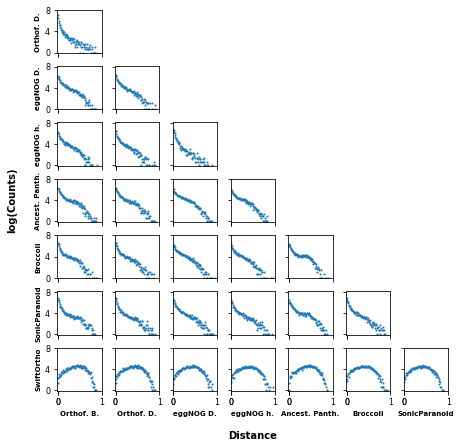

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as s
import numpy as np
import seaborn as sns
from sklearn.utils.extmath import stable_cumsum

fig = plt.figure(figsize = (two_column, two_column))
ax0 = fig.add_subplot(111, frameon=False)
ax0.set_ylabel("log(Counts)", size=10, fontweight = "bold", labelpad = 40)
ax0.set_xlabel("Distance", size = 10, fontweight = "bold", labelpad = 40)
ax0.set_xticks([])
ax0.set_yticks([])
#Rutger: if the log of the counts is a straight line, the distribution is "really" exponential

size = 7 #matrix size

#iterator for the subplots
matrix = np.arange(size**2).reshape(size, size)
matrix = matrix+1
i = []
for n in range(0, size):
    i += list(matrix[n:,n])
    
#rows and columns for the labels
rows = matrix[0:,0]
cols = matrix[size-1:,][0]

j = 0
for name in file_list:
    df = data_dict[name]
    dists = df.loc[:,1]
    dc = dists.value_counts().sort_index()
    dcd = pd.DataFrame({'distance': dc.index, 'counts': np.log(dc.values)})
    a = range(0,len(dc),3)
    ax = fig.add_subplot(size,size,i[j])
    ax.scatter(dcd.loc[:,'distance'], dcd.loc[:,'counts'],linestyle = 'None', marker = 'o', s = 1)
    
    plt.ylim(-0.1,8.1)
    plt.xlim(-0.0125,1)
    ax.set_xticks([int(0),int(0.5),int(1)])
    ax.xaxis.set_tick_params(labelsize=8)
    ax.set_yticks([0,4,8])
    ax.yaxis.set_tick_params(labelsize=8)

    if i[j] not in rows:
        labels = [item.get_text() for item in ax.get_yticklabels()]
        empty_string_labels = ['']*len(labels)
        ax.set_yticklabels(empty_string_labels)
    if i[j] in rows:
        ax.set_ylabel(re_names[name.split("_vs_")[-1]], size=7, fontweight = "bold")
    if i[j] not in  cols:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        empty_string_labels = ['']*len(labels)
        ax.set_xticklabels(empty_string_labels)
    if i[j] in cols:
        ax.set_xlabel(re_names[name.split("_vs_")[0]], size=7, fontweight = "bold")
    j+=1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

import os.path
from os import path

file_name = "".join(['./Figures/Supplementary/Distances_between_orthologies.pdf'])

plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.05, format = 'pdf')

### Load data from sql database

In [1]:
import re
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import sys

import eukarya
# Load the specific table objects
from eukarya.database import Species, Proteins, Genes, engine, Session, get_orthology_leca_tables

# Setting up the logger
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)-8s %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

session = Session()  # Start DB session

In [2]:
def loadOrthologies(table):
    ''' Loads the orthology table into a dictionary. '''
    og_dict = dict()
    query = session.query(table.gene_id,table.og_id).distinct()
    logger.info(query.statement)
    for gene_id,og_id in query.all():
        og_dict[gene_id] = og_id
    return og_dict

def loadLECAOrthologies(table,leca_table):
    ''' Loads the leca filtered orthology table into a dictionary. '''
    og_dict = dict()
    query = session.query(table.gene_id,table.og_id).join(leca_table).distinct()
    logger.info(query.statement)
    for gene_id,og_id in query.all():
        og_dict[gene_id] = og_id
        if gene_id == '1421252':
            print(og_id)
    return og_dict

In [ ]:
# Load the orthologies unfiltered for LECA OGs

Orthologies = dict()
for orthodef,tables in get_orthology_leca_tables().items():
    Orthologies[orthodef] = loadOrthologies(tables[0])
# Load the orthologies filtered for leca OGs
Orthologies_leca_ogs = dict()
for orthodef,tables in get_orthology_leca_tables().items():
    Orthologies_leca_ogs[orthodef] = loadLECAOrthologies(tables[0],tables[1])

2020-04-15 13:20:21 INFO     SELECT DISTINCT annotations.orthofinder_diamond.gene_id, annotations.orthofinder_diamond.og_id 
FROM annotations.orthofinder_diamond
2020-04-15 13:20:30 INFO     SELECT DISTINCT annotations.eggnog_diamond.gene_id, annotations.eggnog_diamond.og_id 
FROM annotations.eggnog_diamond


In [ ]:
# Some lists of Orthologies keys for ease of use

# All the orthology definitions, including the Manual set
Orthologies_all = list(Orthologies.keys())

# All the to be tested orthology definitions
Orthologies_cropped = Orthologies_all.copy()
Orthologies_cropped.remove('manual')

In [65]:
# Create a pandas table to store the results in for nice tabular representation.
ars_df = pd.DataFrame({"Orthology": Orthologies_all})
ars_df = ars_df.set_index("Orthology")

In [66]:
# Pre-make the set of gene ids for manual so that we don't have to do it each itteration
manual_gene_ids = set(Orthologies['manual'].keys())

# Lists to store results in
ars = list()
intersect_size = list()

for ogdef in Orthologies_all:
    # First get the intersect of gene ids
    ogdef_gene_ids = set(Orthologies[ogdef].keys())
    intersect = manual_gene_ids.intersection(ogdef_gene_ids)
    intersect_size.append(len(intersect))  # Store the size of the set to be compared
    
    # Convert the gene ids into the Ortho group names (labels)
    manual_ogid_labels = [Orthologies['manual'][id] for id in sorted(intersect)]
    ogdef_ogid_labels = [Orthologies[ogdef][id] for id in sorted(intersect)]
    
    # Calculate the ARS score
    ars.append(adjusted_rand_score(manual_ogid_labels,ogdef_ogid_labels))
    
# Add results to table and show
ars_df["pairwise ARS"] = ars
ars_df["pairwise set size"] = intersect_size
ars_df

,pairwise ARS,pairwise set size
Orthology,,
orthofinder_diamond_e-3,0.845478,5993
eggnog_diamond,0.890591,5213
eggnog_hmmer_corrected,0.897013,5046
orthofinder_blast_e-3,0.785134,5993
panther_corrected,0.921149,5361
manual,1.000000,5993
broccoli,0.825947,5671
swiftortho,0.311187,5406
sonicparanoid_sensitive,0.813915,5414


In [67]:
# Note that the difference in the code here is the use of the Orthologies_leca_ogs dict instead of the Orthologies dict.
import numpy as np
# Lists to store results in
ars = list()
intersect_size = list()

for ogdef in Orthologies_all:
    # First get the intersect of gene ids
    print(ogdef)
    ogdef_gene_ids = set(Orthologies_leca_ogs[ogdef].keys())
    intersect = manual_gene_ids.intersection(ogdef_gene_ids)
    # Convert the gene ids into the Ortho group names (labels)
    laura_id = []
    for id in sorted(intersect):
        if id not in Orthologies_leca_ogs['manual']:
            laura_id += [id]
    #print(sorted(laura_id))
    main_list = list(np.setdiff1d(list(intersect),laura_id, assume_unique=True))
    manual_ogid_labels = [Orthologies_leca_ogs['manual'][id] for id in sorted(main_list)]
    ogdef_ogid_labels = [Orthologies_leca_ogs[ogdef][id] for id in sorted(main_list)]
    
    # Calculate the ARS score
    ars.append(adjusted_rand_score(manual_ogid_labels,ogdef_ogid_labels))
    intersect_size.append(len(main_list))  # Store the size of the set to be compared

# Add results to table and show
ars_df["Pairwise ARS LECA"] = ars
ars_df["Pairwise LECA set size"] = intersect_size
ars_df

orthofinder_diamond_e-3
eggnog_diamond
eggnog_hmmer_corrected
orthofinder_blast_e-3
panther_corrected
manual
broccoli
swiftortho
sonicparanoid_sensitive


,pairwise ARS,pairwise set size,Pairwise ARS LECA,Pairwise LECA set size
Orthology,,,,
orthofinder_diamond_e-3,0.845478,5993,0.913631,4920
eggnog_diamond,0.890591,5213,0.935964,4308
eggnog_hmmer_corrected,0.897013,5046,0.939985,4178
orthofinder_blast_e-3,0.785134,5993,0.820311,5278
panther_corrected,0.921149,5361,0.921149,5361
manual,1.000000,5993,1.000000,5993
broccoli,0.825947,5671,0.891523,5052
swiftortho,0.311187,5406,0.520663,3295
sonicparanoid_sensitive,0.813915,5414,0.878832,4596


### Grid plots

In [224]:
from seaborn import cm
#from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
autumn = cm.rocket_r
newcolors = autumn(np.linspace(0.15, 0.8, 256))#[::-1]
print(newcolors)
white = np.array([1, 1, 1, 1])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)

[[0.96492035 0.69534192 0.5451917  1.        ]
 [0.96479861 0.68910113 0.53756026 1.        ]
 [0.96479861 0.68910113 0.53756026 1.        ]
 ...
 [0.30592213 0.11432553 0.29542718 1.        ]
 [0.29977678 0.11356089 0.29254823 1.        ]
 [0.29977678 0.11356089 0.29254823 1.        ]]


In [228]:
re_names = {'eggnog_diamond': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected': 'eggNOG hmm',\
'orthofinder_diamond_e-3': 'Orthof. DIAMOND',\
'orthofinder_blast_e-3': 'Orthof. BLAST',\
'panther_corrected': 'Ancest. Panther',\
'sonicparanoid_sensitive': 'SonicParanoid',\
'swiftortho': 'SwiftOrtho',\
'broccoli': 'Broccoli'}

['orthofinder_diamond_e-3', 'eggnog_diamond', 'eggnog_hmmer_corrected', 'orthofinder_blast_e-3', 'panther_corrected', 'broccoli', 'swiftortho', 'sonicparanoid_sensitive']
orthofinder_diamond_e-3
eggnog_diamond
eggnog_hmmer_corrected
orthofinder_blast_e-3
panther_corrected
broccoli
swiftortho
sonicparanoid_sensitive


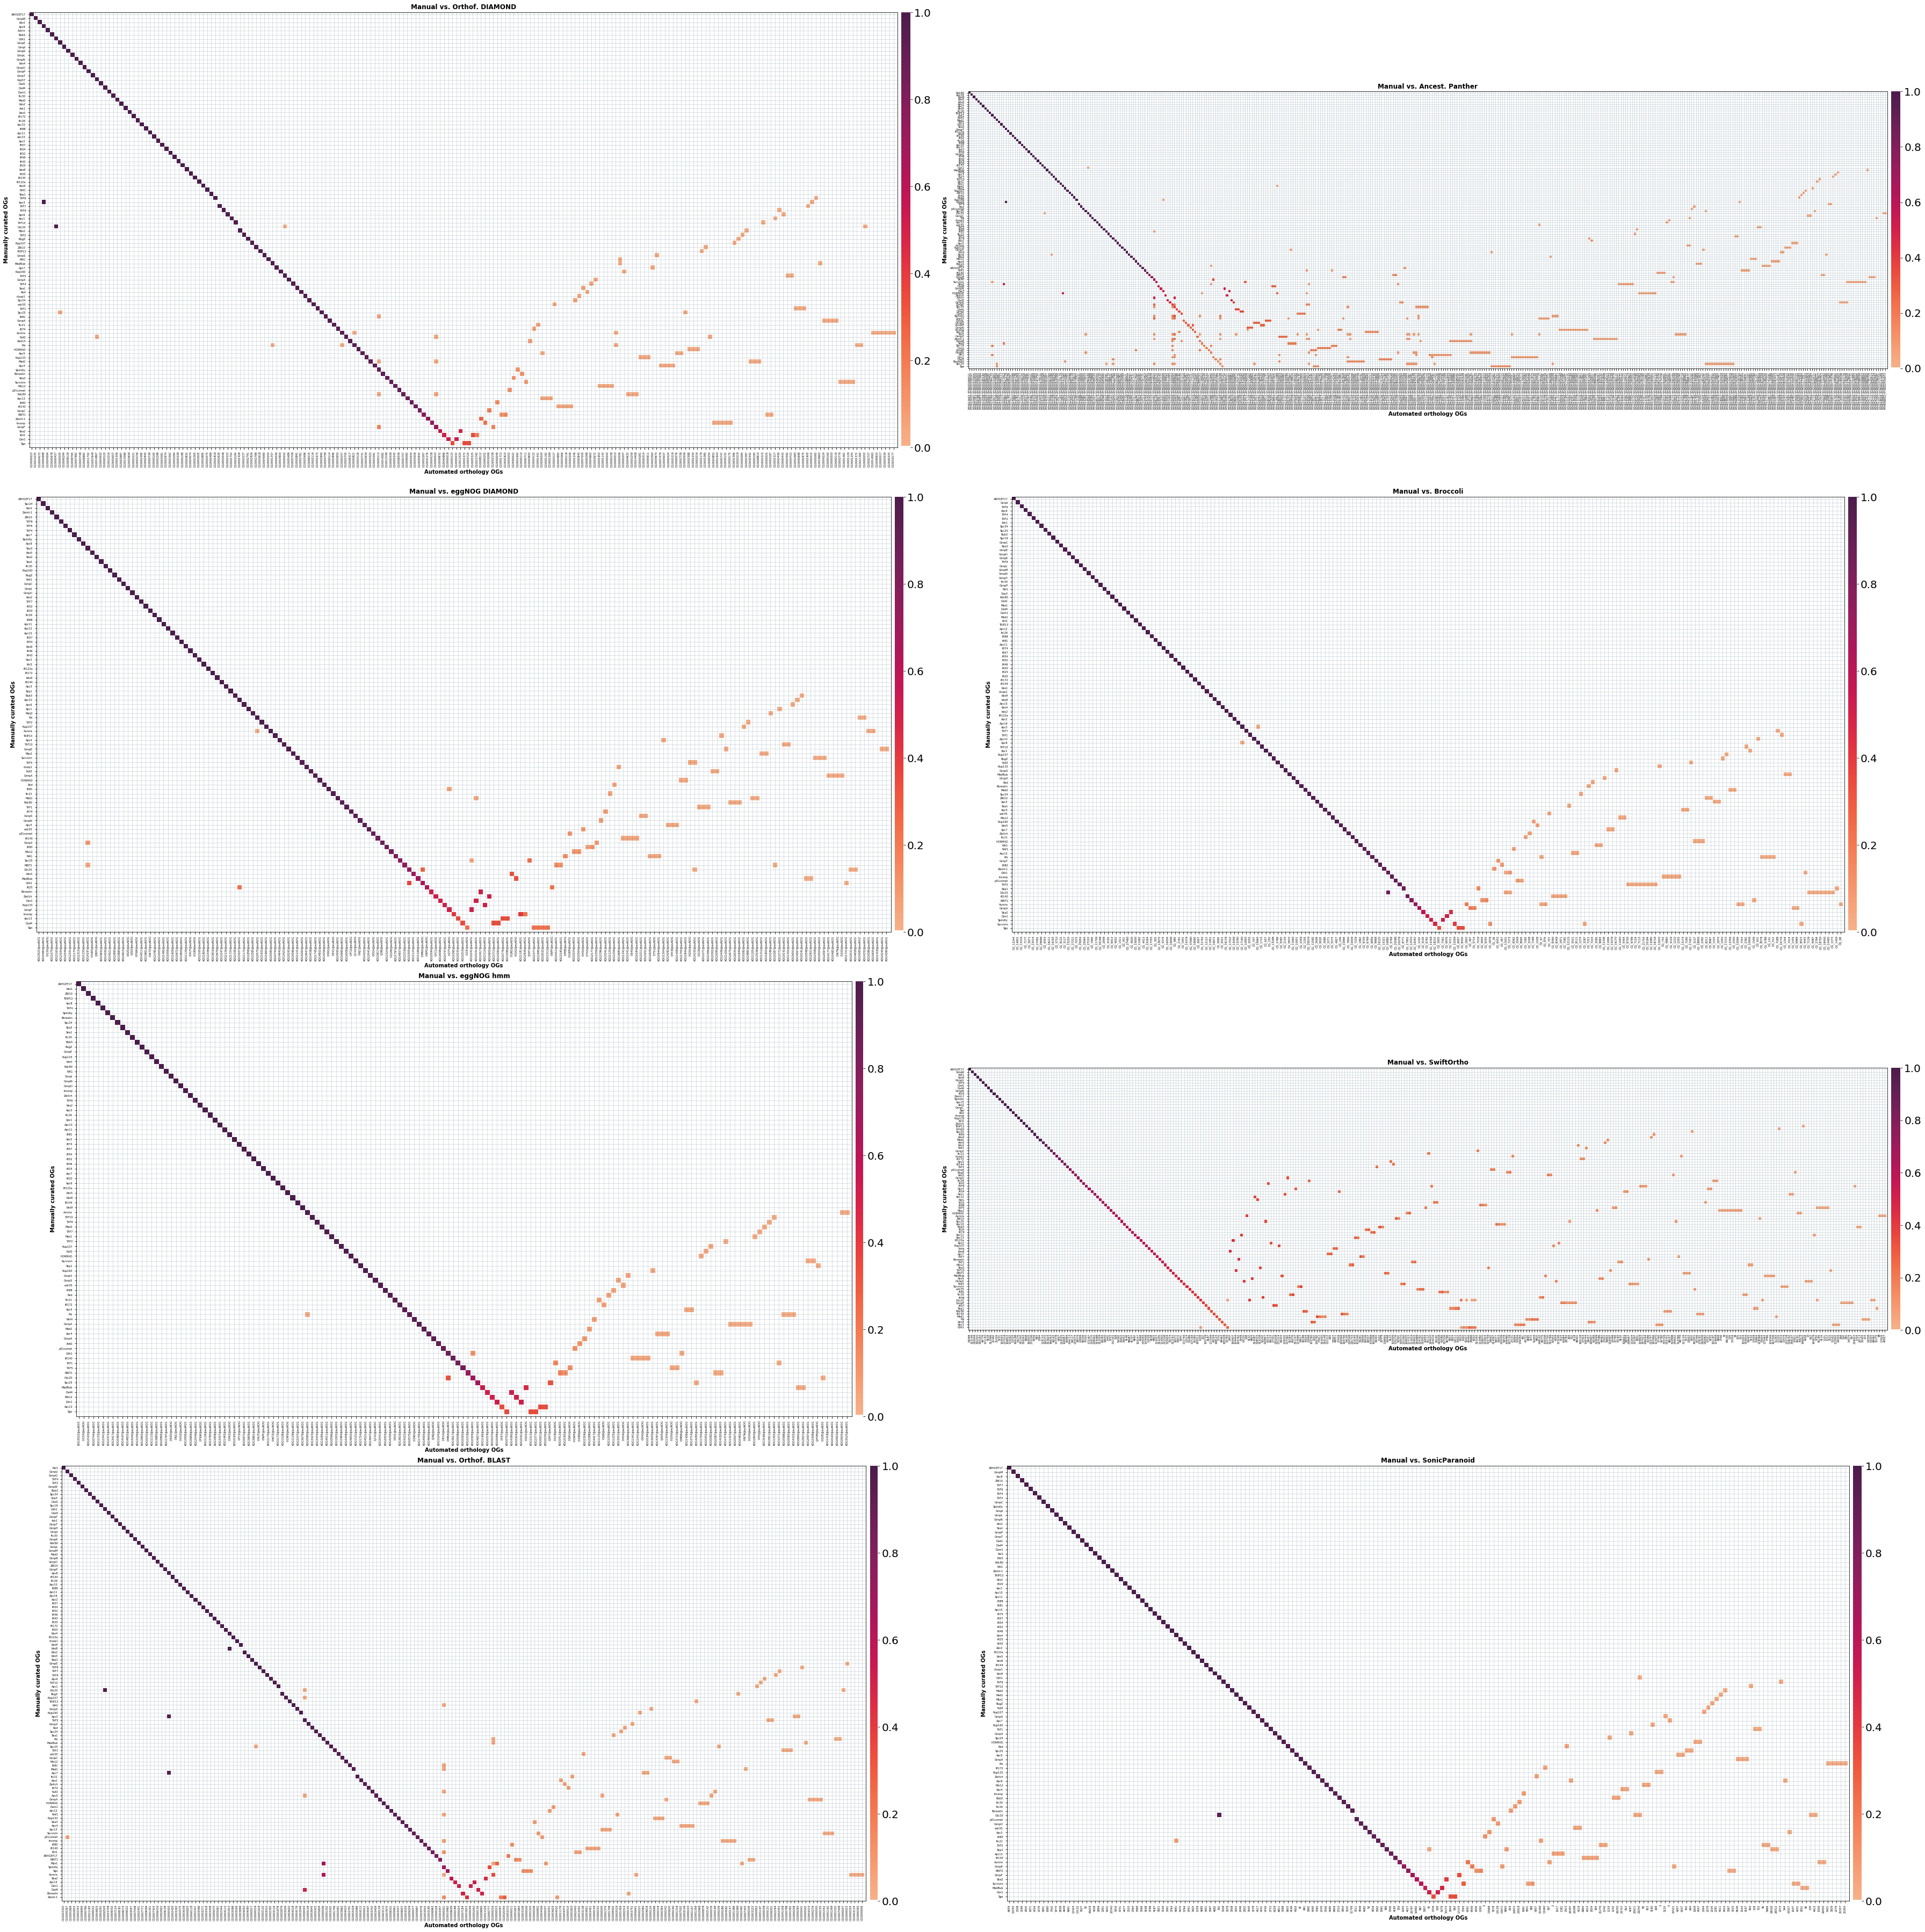

In [233]:
%matplotlib inline

from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Get the intersect in protein ids between all ogs
intersect = set(Orthologies_leca_ogs['manual'].keys())
print(Orthologies_cropped)
for ogdef in Orthologies_cropped:
    intersect = intersect.intersection(set(Orthologies_leca_ogs[ogdef].keys()))
    
x_set1 = Orthologies_leca_ogs['manual'].copy()  # Lets define the x-axis set (Manual)

# Setup the figure with subplots
plt.rcParams.update({'font.size': 8})

fig = plt.figure(figsize=(50, 50))

rows = 4
cols = 2
# Go through each of the other ones as the y-axis set and plot
for axis_id, ogdef in enumerate(Orthologies_cropped):
    plot_coord_x = axis_id % rows
    plot_coord_y = int(axis_id/rows)

    ax = plt.subplot2grid((rows, cols), (plot_coord_x, plot_coord_y))
    
    y_set = Orthologies_leca_ogs[ogdef].copy()  # Define the y-axis set (Automated set)

    # Get the intersect between x and y only and ignore the intersect between all ogdefs
    intersect = set(x_set1.keys()).intersection(set(y_set.keys()))

    # Reduce the sets to the overlapping gene ids
    x_set = {k:v for k,v in x_set1.items() if k in intersect}
    y_set = {k:v for k,v in y_set.items() if k in intersect}
    
    for key, values in y_set.items():
        if key == "Dad1":
            print(key, values)
    
    def convert_dict(d):
        '''Convert the orthology dictionary to a set based dictionary'''
        new_d = dict()
        for key,value in d.items():
            if value in new_d:
                new_d[value].add(key)
            else:
                 new_d[value] = {key}
        return new_d

    # Converting dictionaries to a set based dictionary
    # NOTE: x and y are switched... Manual is actually on the y-axis...
    x_d = convert_dict(x_set)
    y_d = convert_dict(y_set)
    
    # Create empty matrix.
    matrix = np.zeros((len(x_d.keys()),len(y_d.keys())));
    matrix2 = np.zeros((len(x_d.keys()),len(y_d.keys())));
    names_man = ["" for x in range(len(x_d.keys()))]
    names_auto = ["" for x in range(len(y_d.keys()))]
    freq = list()

    # Filling the matrix with the size of the overlap for each x/y OG pair .
    for x,og_id_x in enumerate(sorted(x_d.keys())):
        for y,og_id_y in enumerate(sorted(y_d.keys())):
            names_man[x] = og_id_x
            names_auto[y] = og_id_y
            matrix[x,y] = len(x_d[og_id_x].intersection(y_d[og_id_y]))#/max([len(x_d[i]) for i in x_d.keys()])#/len(x_d[og_id_x])
            matrix2[x,y] = len(x_d[og_id_x].intersection(y_d[og_id_y]))/len(x_d[og_id_x])
            freq.append(len(x_d[og_id_x].intersection(y_d[og_id_y])))


    # Y-axis
    print(ogdef)
    new_array = []
    max_index_coord = []
    rest_index = []
    max_val = []
    r_count = 0

    for row in matrix2:
        max_index = np.argmax(row)
        max_val += [row[max_index]] #the max value
        max_index_coord += [(max_index, r_count)]
        r_count+=1
    max_sorted = [max_index_coord[i] for i in np.argsort(max_val)][::-1]
    
    # Plotting the matrix
    dnx = []
    dny = []
    #from the max_sorted list containing the tuples, make two seperate lists
    for (col, row) in max_sorted:
        if col not in dnx: #multiple per column possible
            dnx += [col]
        dny += [row]
        
    dnxl = []
    #for every column not in the diagonal, add it
    for el in range(0, len(names_auto)):
        if el not in dnx:
            dnxl += [el]
    dnxl_linkage = linkage(matrix2[:,dnxl].transpose(), method='weighted', metric='euclidean', optimal_ordering=False) #cluster onlypart of the matrix
    dnxl_d = dendrogram(dnxl_linkage, no_plot = True) #leaves (restart counting)
    linked_dnxl = [dnxl[i] for i in dnxl_d['leaves']] #get the correct original column numbers

    dnx.extend(linked_dnxl)  

    matrix2 = matrix2[dny,:]
    matrix2 = matrix2[:,dnx]
    matrix = matrix[dny,:]
    matrix = matrix[:,dnx]

    im = ax.imshow(matrix2, cmap=newcmp, interpolation='nearest')
    # NOTE: x and y are switched. Manual is on the y-axis
    ax.set_ylabel("Manually curated OGs", fontsize = 10, fontweight = 'bold')
    ax.set_xlabel("Automated orthology OGs", fontsize = 10, fontweight = 'bold')
    ax.set_title("Manual vs. {}".format(re_names[ogdef]), fontsize = 12, fontweight = 'bold')
    ax.set_yticks(np.arange(len(names_man)))
    ax.set_yticklabels(labels = [names_man[i] for i in dny], fontdict = {'fontsize': 5})
    ax.grid(axis="y", color="#0F3654", alpha=0.3, linewidth=.5, linestyle = '-')
    ax.grid(axis="x", color="#0F3654", alpha=0.3, linewidth=.5, linestyle = '-')
    ax.set_xticks(np.arange(len(names_auto)))
    ax.set_xticklabels(labels = [names_auto[i] for i in dnx], rotation = 90, fontdict =  {'fontsize': 5})   
    
    ax.set_xlim(-0.5, len(names_auto))
    ax.set_ylim(len(names_man), -0.5)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.1)
    cbar = fig.colorbar(im, ax = ax, cax = cax)
    cbar.ax.tick_params(labelsize=20)
    cbar.outline.set_visible(False)
    
    file_intersect = "".join(["./Results/Tables/Intersections_",ogdef,".csv"])
    df = pd.DataFrame(matrix, columns=[names_auto[i] for i in dnx], index=[names_man[i] for i in dny])
    df.to_csv(file_intersect, sep = "\t")
plt.tight_layout()
plt.savefig("./Figures/Supplementary/OG_overlap_manual_vs_all_diagonal.pdf",\
           bbox_inches = 'tight',pad_inches = 0.05, format='pdf',transparent = True)
plt.show()

### Calculate AUC values between methods and distances

In [1]:
import pandas as pd
file_dir = "./Results/Distances/"
files = ["egg_distances_5pubID",\
        "egg_hmm_distances_5pubID_corrected",\
        "od_distances_5pubID",\
        "om3_distances_5pubID",\
        "broccoli_distances_5pubID",\
        "sonicparanoid_sensitive_distances_5pubID",\
        "panther_distances_5pubID_different",\
        "swiftortho_c50_distances_5pubID"]

file_list = ["".join([file_dir, el]) for el in files]


#make dictionary with all the dataframes containing all distances between pairs
data_dict1 = {}
for i in range(len(file_list)):
    file = file_list[i]
    name = file.split("/")[-1]
    print(i, name)
    #only read in cosine and Pseudo negative set. 
    data_dict1[name] = pd.read_csv(file, sep = "\t", index_col = False)
    data_dict1[name].iloc[:,1:-1].astype(float)

0 egg_distances_5pubID
1 egg_hmm_distances_5pubID_corrected
2 od_distances_5pubID
3 om3_distances_5pubID
4 broccoli_distances_5pubID
5 sonicparanoid_sensitive_distances_5pubID
6 panther_distances_5pubID_different
7 swiftortho_c50_distances_5pubID


In [3]:
# rename distance files
re_names_dict = {'egg_distances_5pubID': 'eggNOG DIAMOND',\
'egg_hmm_distances_5pubID_corrected': 'eggNOG hmm',\
'od_distances_5pubID': 'Orthofinder DIAMOND',\
'om3_distances_5pubID': ' '.join(['Orthofinder BLAST', r'$10^{-3}$']),\
'broccoli_distances_5pubID': 'Broccoli',\
'panther_distances_5pubID_different': 'Ancestral Panther',\
'sonicparanoid_sensitive_distances_5pubID': 'Sonicparanoid sensitive',\
'swiftortho_c50_distances_5pubID': 'SwiftOrtho'}

data_dict = {re_names_dict[k]:v for k, v in data_dict1.items()}

In [4]:
#Transform distances
import numpy as np

#Some distances are not between [0,1], so bringing them to 1 for comparison
for ogdef in data_dict:
    data_dict[ogdef].loc[:,"cityblock"] = data_dict[ogdef].loc[:,"cityblock"] / np.nanmax(data_dict[ogdef].loc[:,"cityblock"])
    data_dict[ogdef].loc[:,"euclidean"] = data_dict[ogdef].loc[:,"euclidean"] / np.nanmax(data_dict[ogdef].loc[:,"euclidean"])

    data_dict[ogdef].loc[:,"yule"] = data_dict[ogdef].loc[:,"yule"] / np.nanmax(data_dict[ogdef].loc[:,"yule"])
    
    #for correltation, divide by 2 to get distances
    data_dict[ogdef].loc[:,"spearman"] = data_dict[ogdef].loc[:,"spearman"] / 2
    data_dict[ogdef].loc[:,"kendalltau"] = data_dict[ogdef].loc[:,"kendalltau"] / 2

In [5]:
print(list(data_dict[ogdef].columns.values))
print(data_dict[ogdef].loc[:,['pair','kendalltau']])

['pair', 'braycurtis', 'cityblock', 'cosine', 'dice', 'euclidean', 'jaccard', 'kendalltau', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'spearman', 'yule', 'Interaction']
                  pair    kendalltau
0              20,1123  4.702759e-01
1              20,5018  4.694954e-01
2              20,5021  5.930955e-01
3              20,5025  5.273629e-01
4              20,5026  4.388342e-01
5             20,11139  4.890361e-01
6             20,12637  4.623598e-01
7                41,48  5.386270e-01
8               41,503  4.737568e-01
9              41,1907  5.057084e-01
10             41,4007  5.042856e-01
11             41,4996  5.048455e-01
12             41,6504  5.283069e-01
13            41,11139  5.393648e-01
14            41,11506  5.114168e-01
15            41,11507  4.332129e-01
16            41,14904  3.454545e-01
17            41,41722  5.764547e-01
18            41,73285  4.262148e-01
19             48,1005  3.710367e-01
20             48,1907  5.123479e-

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

auc_r = {}
auc_p = {}
t = {}


i = 0
for ogdef in data_dict:
    i+=1
    print(i, ogdef)
    pseudo = data_dict[ogdef].query('Interaction != "RusselNeg"')
    russel = data_dict[ogdef].query('Interaction != "PseudoNeg"')
    #max value to invert the curve columns.values)
    for distance in list(data_dict[ogdef].columns.values)[1:-1]:
        pseudo = pseudo[pseudo[distance].notna()]
        russel = russel[russel[distance].notna()]
        #since we only case here about the auc value and not plotting a ROC, use roc_auc_score
        #and not auc
        if ogdef not in auc_p:
            auc_p[ogdef] = {}
            auc_p[ogdef][distance] = roc_auc_score(pseudo.loc[:,"Interaction"],\
                                       pseudo.loc[:,distance])
        else:
            auc_p[ogdef][distance] = roc_auc_score(pseudo.loc[:,"Interaction"],\
                                       pseudo.loc[:,distance])
        if ogdef not in auc_r:
            auc_r[ogdef] = {}
            auc_r[ogdef][distance] = roc_auc_score(russel.loc[:,"Interaction"],\
                                        russel.loc[:,distance])
        else:
            auc_r[ogdef][distance] = roc_auc_score(russel.loc[:,"Interaction"],\
                                        russel.loc[:,distance])

1 eggNOG DIAMOND
2 eggNOG hmm
3 Orthofinder DIAMOND
4 Orthofinder BLAST $10^{-3}$
5 Broccoli
6 Sonicparanoid sensitive
7 Ancestral Panther
8 SwiftOrtho


### Plotting all auc values for distances and methods

/Users/eva/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


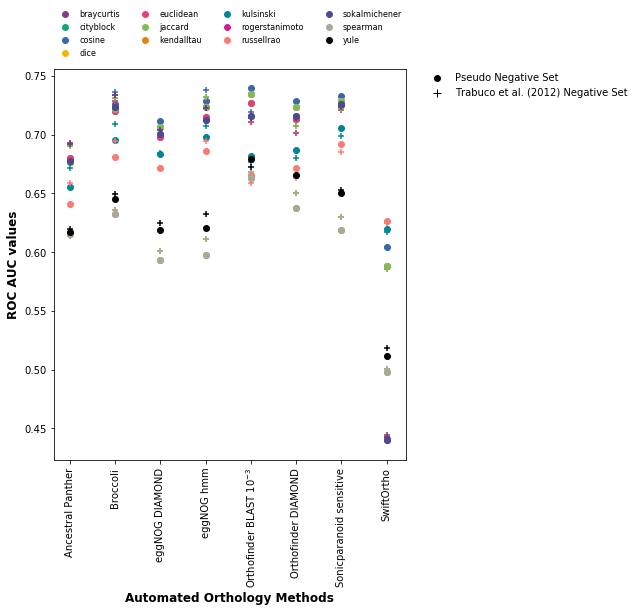

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

color_list = ['#7F3C8D','#11A579','#3969AC','#F2B701','#E73F74','#80BA5A','#E68310','#008695','#CF1C90',\
              '#f97b72','#4b4b8f','#A5AA99','#000000']
dummie = list(data_dict['Orthofinder DIAMOND'].columns.values)[1:-1]
color_dict = dict(zip(dummie, color_list))


fig = plt.figure(figsize = (0.9*7.0078778,0.9*8))

for ogdef in sorted(auc_p.keys(), key=str.lower):
    ax = fig.add_subplot(1,1,1)
    dist_list = []
    for distance in auc_p[ogdef]:
        if distance not in dist_list:
            dist_list += [distance]
        
        ax.scatter(ogdef, auc_p[ogdef][distance], c = color_dict[distance])
        ax.scatter(ogdef, auc_r[ogdef][distance], color = color_dict[distance], marker = "+")

custom_dots = []
for distance in dist_list:
    custom_dots += [Line2D([0], [0], marker='o', color="w", label=distance,\
                          markerfacecolor=color_dict[distance], markersize=8)]

custom_legend = []    
custom_legend += [Line2D([0], [0], marker='o', color='w', label="Pseudo Negative Set",\
                          markerfacecolor="black", markersize=8, linestyle = 'none')]
custom_legend += [Line2D([0], [0], marker='+', color='black', label="Trabuco et al. (2012) Negative Set",\
                          markerfacecolor="black", markersize=8, linestyle = 'none')]

distance_legend = plt.legend(handles=custom_dots, loc = 3, ncol = 4, prop={'size': 8}, mode = 'expand',\
           bbox_to_anchor = (0., 1.02, 1., .102),\
           borderaxespad=0., frameon = False)

plt.gca().add_artist(distance_legend)

ax.legend(handles = custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,\
          frameon = False)

plt.xticks(rotation = 90, size = 10)
plt.yticks(size = 10)
plt.ylabel("ROC AUC values", size=12, fontweight = "bold")
plt.xlabel("Automated Orthology Methods", size=12, fontweight = "bold") 

file_name = "./Figures/Supplementary/AUC_all_distances.pdf"
plt.savefig(file_name, bbox_inches = 'tight',pad_inches = 0.05, format='pdf',\
                transparent = True)

### ARS compared to group overlap %

In [68]:
import random

random.seed(183159236135)  # Set the random seed so we get the same result upon repeat of the analysis

# For ARS we need a list containing the orthology id labels; the position corresponds to a gene id
Orthology_labels = list(Orthologies['manual'].values())
# Get the length of the set, we'll use this often
Orthology_size = len(Orthology_labels)

# Create a pandas table to keep scores
ars_baseline_df = pd.DataFrame()

# For percentages 0, 10, 20, ... ,100%; do ...
for pcnt in range(0,101,10):  
    # determine the number of elements we want to shuffle
    fraction_size = int(Orthology_size/100*pcnt)  
    scores = dict()  # Dict to keep all repeat scores
    scores["% shuffled"] = int(pcnt)
    
    for x in range(101):
        # Shuffle a part of the labels
        shuffled_indices = random.sample(range(Orthology_size),fraction_size)  # Randomly pick index positions to shuffle
        sorted_indices = sorted(shuffled_indices)  # Sort these randomly picked indices
        new_index = list(range(Orthology_size))  # An index for the entire Orthology_labels list
        # Loop over the sorted indices and replace these by the "shuffled" indices
        for i in sorted_indices:
            new_index[i] = shuffled_indices.pop()

        # Partly shuffle the original og list by using the new_index
        partly_shuffled_ogs = []  # New empty list    
        for i in new_index:
            partly_shuffled_ogs.append(Orthology_labels[i])

        # Calculate the rand score of the shuffeld versus non-shuffled og set
        rand_score = adjusted_rand_score(Orthology_labels,partly_shuffled_ogs)
        
        scores["ARS_{:02d}".format(x+1)]=rand_score

    # Store in ars_scores list
    ars_baseline_df = ars_baseline_df.append(scores, ignore_index=True)

ars_baseline_df = ars_baseline_df.set_index("% shuffled")


# Show table
ars_baseline_df

,ARS_01,ARS_02,ARS_03,ARS_04,ARS_05,ARS_06,ARS_07,ARS_08,ARS_09,ARS_10,...,ARS_90,ARS_91,ARS_92,ARS_93,ARS_94,ARS_95,ARS_96,ARS_97,ARS_98,ARS_99
% shuffled,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10.0,0.811962,0.811406,0.810916,0.814585,0.814957,0.810287,0.799035,0.819606,0.821800,0.822695,...,0.811169,0.815386,0.826634,0.813629,0.805290,0.808256,0.811382,0.813772,0.814082,0.808379
20.0,0.644066,0.642861,0.642694,0.634771,0.634485,0.645799,0.642685,0.634992,0.635944,0.641047,...,0.641235,0.644160,0.643895,0.644234,0.647433,0.638841,0.644017,0.646211,0.644704,0.631221
30.0,0.506242,0.495100,0.505927,0.492853,0.478144,0.488714,0.498177,0.490030,0.489282,0.500354,...,0.486365,0.491219,0.496886,0.504959,0.489539,0.494026,0.501899,0.494879,0.486524,0.493204
40.0,0.361153,0.347633,0.360348,0.356630,0.357574,0.378227,0.363551,0.365819,0.363368,0.361611,...,0.364532,0.374493,0.352250,0.371359,0.366493,0.358011,0.359576,0.354440,0.367613,0.369423
50.0,0.259291,0.252403,0.255099,0.254613,0.257416,0.250797,0.256893,0.246687,0.253220,0.244999,...,0.251308,0.260010,0.252460,0.256603,0.264243,0.251202,0.253277,0.257506,0.254585,0.252685
60.0,0.172592,0.161062,0.160277,0.166741,0.164568,0.166185,0.159550,0.161965,0.165421,0.166545,...,0.162999,0.162974,0.168077,0.163362,0.163775,0.164739,0.168461,0.163146,0.164911,0.177033
70.0,0.093120,0.100859,0.094697,0.095592,0.093132,0.092311,0.090268,0.095947,0.098550,0.094068,...,0.094137,0.092642,0.091000,0.091425,0.095478,0.086166,0.092936,0.091469,0.090035,0.092908
80.0,0.041546,0.045264,0.040749,0.043568,0.043368,0.043642,0.043744,0.040414,0.042347,0.041333,...,0.043294,0.043135,0.042722,0.045247,0.041566,0.040794,0.039470,0.041599,0.041599,0.043384


In [69]:
# Lets get the quantiles per row
ars_baseline_quantiles = ars_baseline_df.quantile([0,0.25,0.5,0.75,1.0],axis=1)
ars_baseline_quantiles.index.name = 'Quantiles'
ars_baseline_quantiles

% shuffled,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
Quantiles,,,,,,,,,,,
0.00,1.0,0.799035,0.626024,0.478144,0.347633,0.242168,0.152621,0.086166,0.037141,0.009497,-0.000660
0.25,1.0,0.808379,0.638841,0.490336,0.360548,0.252117,0.162092,0.091028,0.041280,0.010760,-0.000211
0.50,1.0,0.811962,0.644017,0.494839,0.363690,0.254053,0.164657,0.093002,0.042298,0.011246,-0.000002
0.75,1.0,0.815757,0.646800,0.498810,0.368728,0.257506,0.167007,0.095424,0.043266,0.012022,0.000174
1.00,1.0,0.826634,0.660042,0.511831,0.378227,0.264435,0.181115,0.100859,0.046665,0.014061,0.000852


In [70]:
%matplotlib inline
# Lets plot
import matplotlib.pyplot as plt

re_name_matrix = {'eggnog_diamond': 'eggNOG DIAMOND',\
'eggnog_hmmer_corrected': 'eggNOG hmm',\
'orthofinder_diamond_e-3': 'Orthofinder DIAMOND',\
'orthofinder_blast_e-3': 'Orthofinder BLAST',\
'panther_corrected': 'Ancestral Panther',\
'sonicparanoid_sensitive': 'SonicParanoid',\
'swiftortho': 'SwiftOrtho',\
'broccoli': 'Broccoli', "manual": "Manual"}

colors2 = ['#7F3C8D', '#11A579','#3969AC','#F2B701','#E73F74','#80BA5A', '#000000', '#808080','#c0ff33','#ff9033']

colors = {'eggNOG DIAMOND': colors2[0],\
          'eggNOG hmm':colors2[1],\
          'Orthofinder DIAMOND':colors2[2],\
          'Orthofinder BLAST':colors2[4],\
          'Ancestral Panther':colors2[5],\
          'Broccoli': colors2[3],
          'SonicParanoid': colors2[6],\
          'SwiftOrtho': colors2[7]}

broccoli Broccoli
eggnog_diamond eggNOG DIAMOND
eggnog_hmmer_corrected eggNOG hmm
orthofinder_blast_e-3 Orthofinder BLAST
orthofinder_diamond_e-3 Orthofinder DIAMOND
panther_corrected Ancestral Panther
sonicparanoid_sensitive SonicParanoid
swiftortho SwiftOrtho


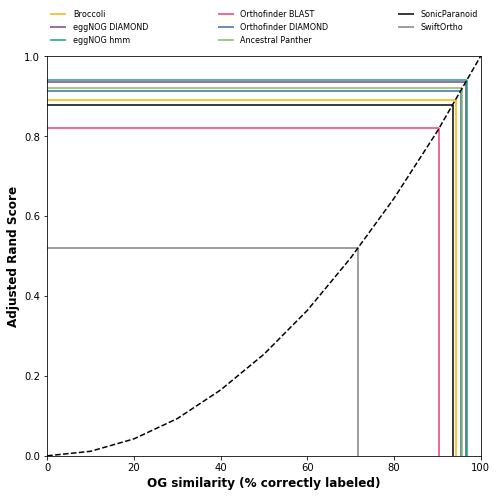

In [73]:
# Plot the randscore median
fig = plt.figure(figsize = (two_column, two_column))

pcnt = list(ars_baseline_quantiles.columns)

# Lets invert scores as it now is per pcnt difference, but it makes more sense to plot percent similar
rand_scores_q25 = list(ars_baseline_quantiles.loc[0.25])
rand_scores_q50 = list(ars_baseline_quantiles.loc[0.50])
rand_scores_q75 = list(ars_baseline_quantiles.loc[0.75])

rand_scores_q25.reverse()
rand_scores_q50.reverse()
rand_scores_q75.reverse()

plt.plot(pcnt,rand_scores_q50, color =  "black", linestyle = "--") # plot the median randscore versus % curve
# The q25 and q75 are almost on top of the q50, so no need to show them
#plt.plot(pcnt,rand_scores_q25) # plot the q25 randscore versus % curve
#plt.plot(pcnt,rand_scores_q75) # plot the q75 randscore versus % curve

def plot_lines(plt, score, x, y, label):
    # plot the scores for each orthology comparisson
    y_fit = np.interp(score, x, y)
    plt.hlines(y=score, xmin=0, xmax=y_fit, color=colors[re_name_matrix[label]], label = re_name_matrix[label])
    plt.vlines(x=y_fit, ymin=0, ymax=score, color=colors[re_name_matrix[label]])


# plot the scores for each orthology comparisson
for orthology in sorted(ars_df.index, key=str.lower):
    if orthology not in ["manual"]:
        print(orthology, re_name_matrix[orthology])
        plot_lines(plt, ars_df.loc[orthology,"Pairwise ARS LECA"], rand_scores_q50, pcnt,\
                   label = orthology)

plt.yticks(size = 10)
plt.xticks([0,20,40,60,80, 100],size = 10)
plt.legend(loc = 3, ncol = 3, prop={'size': 8}, mode = 'expand', bbox_to_anchor = (0., 1.02, 1., .102),\
           borderaxespad=0., frameon = False)
plt.tight_layout()
plt.xlabel("OG similarity (% correctly labeled)", size = 12, fontweight = 'bold')
plt.ylabel('Adjusted Rand Score', size = 12, fontweight = 'bold')
plt.xlim(0,100)
plt.ylim(0,1)
plt.savefig("./Figures/Supplementary/ARS_vs_pcnt_mislabeled_LECA_OGs.pdf",\
            bbox_inches = 'tight',pad_inches = 0.05, format='pdf',transparent = True)
plt.show()

### FGKCS as a non symmetric measure for group overlap

In [4]:
import sys
sys.path.append('./eukarya/scripts_nonsql/')
from fgrand import ComplexComparison  # Import the fgrand k-clique class from the original program directly.

from scipy.stats import hmean  # required for fgrand k clique

def make_clusters_for_fgrand(orthology):
    '''convert from {geneid:ogid} to {ogid:[geneid]} to 
    [[list of gene ids for og],[list of geneids for other og]]
    '''
    ogdict = dict()
    for gid,oid in orthology.items():
        if oid in ogdict.keys():
            ogdict[oid].add(gid)
        else:
            ogdict[oid] = {gid}
    return list(ogdict.values())

In [10]:
# NOTE: This takes a really really long time!!!
# NOTE: This is done on the LECA only OGs because the full sets take even more time.
#       (> 3 hours for one comparrisson)
import sys
sys.path.append('./eukarya/scripts_nonsql/') # Import the fgrand k-clique class from the original program directly.
from fgrand import ComplexComparison  # Import the fgrand k-clique class from the original program directly.
from scipy.stats import hmean  # required for fgrand k clique

# Now for LECA OGs only

col_row_names = sorted(Orthologies_leca_ogs.keys())
col_row_names

n_ogdefs = len(col_row_names)
ogdef_fgkc_matrix_all_ogs = np.empty((n_ogdefs,n_ogdefs))
ogdef_fgkc_matrix_all_ogs.fill(np.nan)

# Unlike ARS, FGKC is non-symmetric, so we need to calculate the whole matrix
for x in range(n_ogdefs):
    for y in range(n_ogdefs): #range(x,n_ogdefs):
        if x == y:
            ogdef_fgkc_matrix_all_ogs[x][y] = 1.0
        else:
            ogdef_x = col_row_names[x]
            ogdef_y = col_row_names[y]
            logger.info("Processing {} vs. {}".format(ogdef_x, ogdef_y))
            fgrand = ComplexComparison(gold_standard=make_clusters_for_fgrand(Orthologies_leca_ogs[ogdef_x]), 
                              clusters = make_clusters_for_fgrand(Orthologies_leca_ogs[ogdef_y]),
                              max_clique=5)
            fgrand_score = fgrand.clique_comparison_metric_grandf1score(mean_func=np.mean)
            ogdef_fgkc_matrix_all_ogs[x][y] = fgrand_score
            logger.info("{} vs. {} = {}".format(ogdef_x, ogdef_y, fgrand_score))

ogdef_fgkc_matrix_all_ogs_df = pd.DataFrame(ogdef_fgkc_matrix_all_ogs, index = col_row_names, columns=col_row_names)
ogdef_fgkc_matrix_all_ogs_df

2020-04-09 08:37:29 INFO     Processing broccoli vs. eggnog_diamond
2020-04-09 08:52:09 INFO     broccoli vs. eggnog_diamond = 0.12177220590423432
2020-04-09 08:52:09 INFO     Processing broccoli vs. eggnog_hmmer_corrected
2020-04-09 09:05:16 INFO     broccoli vs. eggnog_hmmer_corrected = 0.09182740603766937
2020-04-09 09:05:16 INFO     Processing broccoli vs. manual
2020-04-09 09:15:37 INFO     broccoli vs. manual = 0.0002998650551541177
2020-04-09 09:15:37 INFO     Processing broccoli vs. orthofinder_blast_e-3
2020-04-09 09:34:47 INFO     broccoli vs. orthofinder_blast_e-3 = 0.15611794297457607
2020-04-09 09:34:47 INFO     Processing broccoli vs. orthofinder_diamond_e-3
2020-04-09 09:48:17 INFO     broccoli vs. orthofinder_diamond_e-3 = 0.12591379610948675
2020-04-09 09:48:17 INFO     Processing broccoli vs. panther_corrected
2020-04-09 10:00:09 INFO     broccoli vs. panther_corrected = 0.10407315386103665
2020-04-09 10:00:09 INFO     Processing broccoli vs. sonicparanoid_sensitive
2

2020-04-09 17:37:08 INFO     panther_corrected vs. eggnog_diamond = 0.17602087961392748
2020-04-09 17:37:08 INFO     Processing panther_corrected vs. eggnog_hmmer_corrected
2020-04-09 17:44:08 INFO     panther_corrected vs. eggnog_hmmer_corrected = 0.21220608040258734
2020-04-09 17:44:08 INFO     Processing panther_corrected vs. manual
2020-04-09 17:48:50 INFO     panther_corrected vs. manual = 0.00039979204473681484
2020-04-09 17:48:50 INFO     Processing panther_corrected vs. orthofinder_blast_e-3
2020-04-09 17:58:45 INFO     panther_corrected vs. orthofinder_blast_e-3 = 0.12989025441381022
2020-04-09 17:58:45 INFO     Processing panther_corrected vs. orthofinder_diamond_e-3
2020-04-09 18:07:21 INFO     panther_corrected vs. orthofinder_diamond_e-3 = 0.1066390566519563
2020-04-09 18:07:21 INFO     Processing panther_corrected vs. sonicparanoid_sensitive
2020-04-09 18:14:57 INFO     panther_corrected vs. sonicparanoid_sensitive = 0.16169678651526337
2020-04-09 18:14:57 INFO     Proces

,broccoli,eggnog_diamond,eggnog_hmmer_corrected,manual,orthofinder_blast_e-3,orthofinder_diamond_e-3,panther_corrected,sonicparanoid_sensitive,swiftortho
broccoli,1.000000,0.121772,0.091827,0.000300,0.156118,0.125914,0.104073,0.090184,0.012832
eggnog_diamond,0.149376,1.000000,0.236610,0.000300,0.371491,0.312185,0.209745,0.213979,0.021736
eggnog_hmmer_corrected,0.155709,0.491771,1.000000,0.000599,0.197102,0.188967,0.501035,0.266796,0.030643
manual,0.502194,0.843129,0.807655,1.000000,0.572057,0.748964,0.897520,0.534659,0.093666
orthofinder_blast_e-3,0.122974,0.219050,0.099376,0.000200,1.000000,0.349084,0.126249,0.114266,0.011230
orthofinder_diamond_e-3,0.164190,0.344344,0.144032,0.000400,0.570590,1.000000,0.144278,0.161358,0.021028
panther_corrected,0.092686,0.176021,0.212206,0.000400,0.129890,0.106639,1.000000,0.161697,0.014357
sonicparanoid_sensitive,0.140765,0.401596,0.208764,0.000200,0.255352,0.234297,0.276021,1.000000,0.024708
swiftortho,0.093146,0.132905,0.119988,0.000598,0.063527,0.087027,0.111376,0.125616,1.000000


In [30]:
ogdef_fgkc_matrix_all_ogs_df.to_csv("./Results/Tables/FGKC_allvsall_leca.csv", sep="\t", )

In [34]:
FGKC_matrix = pd.read_csv("./Results/Tables/FGKC_allvsall_leca.csv", sep="\t", index_col=0)
FGKC_matrix = FGKC_matrix.rename(columns=re_name_matrix,\
                                 index = re_name_matrix) #rename the column and row names
#reorder matrix
cols = list(FGKC_matrix.columns.values)
print(cols)
FGKC_matrix

['Broccoli', 'eggNOG DIAMOND', 'eggNOG hmm', 'Manual', 'Orthofinder BLAST', 'Orthofinder DIAMOND', 'Ancestral Panther', 'SonicParanoid', 'SwiftOrtho']


,Broccoli,eggNOG DIAMOND,eggNOG hmm,Manual,Orthofinder BLAST,Orthofinder DIAMOND,Ancestral Panther,SonicParanoid,SwiftOrtho
Broccoli,1.000000,0.121772,0.091827,0.000300,0.156118,0.125914,0.104073,0.090184,0.012832
eggNOG DIAMOND,0.149376,1.000000,0.236610,0.000300,0.371491,0.312185,0.209745,0.213979,0.021736
eggNOG hmm,0.155709,0.491771,1.000000,0.000599,0.197102,0.188967,0.501035,0.266796,0.030643
Manual,0.502194,0.843129,0.807655,1.000000,0.572057,0.748964,0.897520,0.534659,0.093666
Orthofinder BLAST,0.122974,0.219050,0.099376,0.000200,1.000000,0.349084,0.126249,0.114266,0.011230
Orthofinder DIAMOND,0.164190,0.344344,0.144032,0.000400,0.570590,1.000000,0.144278,0.161358,0.021028
Ancestral Panther,0.092686,0.176021,0.212206,0.000400,0.129890,0.106639,1.000000,0.161697,0.014357
SonicParanoid,0.140765,0.401596,0.208764,0.000200,0.255352,0.234297,0.276021,1.000000,0.024708
SwiftOrtho,0.093146,0.132905,0.119988,0.000598,0.063527,0.087027,0.111376,0.125616,1.000000


### Heatmap FGKCS

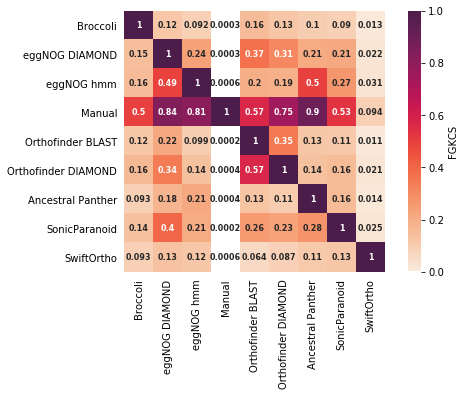

In [32]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams.update({'figure.autolayout': True})

cmap = sns.cm.rocket_r

from seaborn import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
autumn = cm.rocket_r
newcolors = autumn(np.linspace(0, 0.8, 256))#[::-1]

white = np.array([1, 1, 1, 1])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)


fig = plt.figure(figsize = (two_column,0.80*two_column))


hmap = sns.heatmap(FGKC_matrix, vmin=0, vmax=1, cmap = newcmp,\
                  annot = True, annot_kws={"size": 8, 'weight': 'bold'},\
                  cbar = True, square = True, cbar_kws={'label': 'FGKCS'})

plt.tight_layout()
plt.tick_params(left = False, bottom = False)
fig.savefig("./Figures/Supplementary/FGKC_heatmap_leca.pdf",\
           bbox_inches = 'tight',pad_inches = 0.05, format='pdf',transparent = True)

### FGKCS compared to % clutser overlap

In [40]:
import pandas as pd

fgrandkclique_leca_df = pd.DataFrame(columns=["Orthology",
                                         "Sensitivity",
                                         "PPV",
                                         "ACC",
                                         "MMR",
                                         "PWMMR",
                                         "MMR_PWMMR_hmean",
                                         "Precision measure",
                                         "Recall measure",
                                         "Precision Recall product",
                                         "Clique Precision Mean",
                                         "Recall Mean",
                                         "F-Grand K-Clique",
                                         "Clique Weighted Precision Mean",
                                         "Weighted Recall Mean",
                                         "Clique Weighted hmean (F-weighted K-Clique)"])

fgrandkclique_leca_df.set_index("Orthology")

for ogdef in Orthologies_all:
    if ogdef in skip_list:
        continue
    # First get the intersect of gene ids
    logger.info("Processing {}".format(ogdef))
    ogdef_gene_ids = set(Orthologies_leca_ogs[ogdef].keys())
    

    fgrand = ComplexComparison(gold_standard=make_clusters_for_fgrand(Orthologies_leca_ogs['manual']), 
                              clusters = make_clusters_for_fgrand(Orthologies_leca_ogs[ogdef]),
                              max_clique=5)
    
    d = dict()
    d["Orthology"] = ogdef
    d["Sensitivity"] = fgrand.sensitivity()
    d["PPV"] = fgrand.ppv()
    d["ACC"] = fgrand.acc()
    d["MMR"] = fgrand.mmr()
    d["PWMMR"] = fgrand.pwmmr()
    d["MMR_PWMMR_hmean"] = fgrand.mmr_pwmmr_hmean()
    d["Precision measure"] = fgrand.precision_measure()
    d["Recall measure"] = fgrand.recall_measure()
    d["Precision Recall product"] = fgrand.precision_recall_product()
    ccmm = fgrand.clique_comparison_metric_mean()
    d["Clique Precision Mean"] = ccmm['precision_mean']
    d["Recall Mean"] = ccmm['recall_mean']
    d["F-Grand K-Clique"] = fgrand.clique_comparison_metric_grandf1score(mean_func=np.mean)
    wccmm = fgrand.clique_comparison_metric_mean(weighted=True)
    d["Clique Weighted Precision Mean"] = wccmm['precision_mean']
    d["Weighted Recall Mean"] = wccmm['recall_mean']
    d["Clique Weighted hmean (F-weighted K-Clique)"] = hmean([wccmm['precision_mean'],wccmm['recall_mean']])

    fgrandkclique_leca_df = fgrandkclique_leca_df.append(d, ignore_index=True)


fgrandkclique_leca_df = fgrandkclique_leca_df.set_index("Orthology")

fgrandkclique_leca_df.to_csv("./Results/Tables/fgrandkclique_leca_ogs.csv", sep="\t", )
fgrandkclique_leca_df

2020-04-10 11:28:20 INFO     Processing orthofinder_diamond_e-3
2020-04-10 11:29:00 INFO     Processing eggnog_diamond
2020-04-10 11:29:40 INFO     Processing eggnog_hmmer_corrected
2020-04-10 11:30:17 INFO     Processing orthofinder_blast_e-3
2020-04-10 11:31:04 INFO     Processing panther_corrected
2020-04-10 11:31:45 INFO     Processing manual
2020-04-10 11:31:55 INFO     Processing broccoli
2020-04-10 11:32:39 INFO     Processing swiftortho
2020-04-10 11:33:29 INFO     Processing sonicparanoid_sensitive


,Sensitivity,PPV,ACC,MMR,PWMMR,MMR_PWMMR_hmean,Precision measure,Recall measure,Precision Recall product,Clique Precision Mean,Recall Mean,F-Grand K-Clique,Clique Weighted Precision Mean,Weighted Recall Mean,Clique Weighted hmean (F-weighted K-Clique)
Orthology,,,,,,,,,,,,,,,
orthofinder_diamond_e-3,0.790088,0.953862,0.868122,0.199024,0.002486,0.004911,0.002603,0.250089,0.005152,0.734072,0.784657,0.755796,0.739541,0.785464,0.761811
eggnog_diamond,0.677290,0.979805,0.814624,0.161674,0.002447,0.004822,0.002619,0.231007,0.005180,0.959700,0.756519,0.845905,0.959701,0.755013,0.845140
eggnog_hmmer_corrected,0.659937,0.986836,0.807000,0.157850,0.002350,0.004631,0.002781,0.227124,0.005494,0.951719,0.706997,0.811159,0.952186,0.706946,0.811441
orthofinder_blast_e-3,0.832137,0.910572,0.870472,0.219172,0.002674,0.005284,0.002297,0.248542,0.004553,0.481425,0.743401,0.570954,0.488850,0.745041,0.590349
panther_corrected,0.789254,0.959896,0.870403,0.156760,0.003246,0.006360,0.002327,0.225712,0.004607,0.985380,0.820177,0.895214,0.984406,0.818950,0.894088
manual,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999899,0.999899,0.999899,0.999899,0.999899,0.999899
broccoli,0.791757,0.975653,0.878909,0.229623,0.002674,0.005286,0.002504,0.286713,0.004965,0.680621,0.404334,0.502197,0.685740,0.409895,0.513093
swiftortho,0.306191,0.997269,0.552589,0.102981,0.000808,0.001604,0.001384,0.124845,0.002737,0.995257,0.052039,0.093042,0.995220,0.058793,0.111028
sonicparanoid_sensitive,0.714500,0.975413,0.834825,0.211210,0.001901,0.003768,0.002470,0.276487,0.004897,0.720641,0.431153,0.538060,0.731129,0.440831,0.550026


In [36]:
import pandas as pd
import random 

# Create a pandas table to keep scores
fgkc_baseline_df = pd.DataFrame()

random.seed(4971481346)  # Set the random seed so we get the same result upon repeat of the analysis

man_clusters = make_clusters_for_fgrand(Orthologies['manual'])

(man_gene_ids,man_og_ids) = zip(*Orthologies['manual'].items())

# Get the length of the set, we'll use this often
Orthology_size = len(man_og_ids)

# For percentages 0, 10, 20, ... ,100%; do ...
for pcnt in range(0,101,10):  
    # determine the number of elements we want to shuffle
    fraction_size = int(Orthology_size/100*pcnt)  
    scores = dict()  # Dict to keep all repeat scores
    scores["% shuffled"] = int(pcnt)
    
    for x in range(11):
        # Shuffle a part of the labels
        shuffled_indices = random.sample(range(Orthology_size),fraction_size)  # Randomly pick index positions to shuffle
        sorted_indices = sorted(shuffled_indices)  # Sort these randomly picked indices
        new_index = list(range(Orthology_size))  # An index for the entire Orthology_labels list
        # Loop over the sorted indices and replace these by the "shuffled" indices
        for i in sorted_indices:
            new_index[i] = shuffled_indices.pop()

        # Partly shuffle the original og list by using the new_index
        partly_shuffled_ogs = []  # New empty list    
        for i in new_index:
            partly_shuffled_ogs.append(man_og_ids[i])
            
        # Turn the shuffled og-ids back into a dict as before {geneid: ogid}
        partly_shuffled_ogs_dict = dict(zip(man_gene_ids,partly_shuffled_ogs))

        # Calculate the rand score of the shuffeld versus non-shuffled og set
        fgrand = ComplexComparison(gold_standard=man_clusters, 
                              clusters = make_clusters_for_fgrand(partly_shuffled_ogs_dict),
                              max_clique=5)
        
        scores["FGKC_{:02d}".format(x+1)]=fgrand.clique_comparison_metric_grandf1score(mean_func=np.mean)

    # Store in ars_scores list
    fgkc_baseline_df = fgkc_baseline_df.append(scores, ignore_index=True)

fgkc_baseline_df = fgkc_baseline_df.set_index("% shuffled")

# Show table
fgkc_baseline_df

,FGKC_01,FGKC_02,FGKC_03,FGKC_04,FGKC_05,FGKC_06,FGKC_07,FGKC_08,FGKC_09,FGKC_10,FGKC_11
% shuffled,,,,,,,,,,,
0.0,0.999899,0.999899,0.999900,0.999900,0.999900,0.999900,0.999899,0.999899,0.999900,0.999900,0.999899
10.0,0.703874,0.720198,0.734406,0.691374,0.697328,0.722703,0.709483,0.683335,0.700287,0.714471,0.729459
20.0,0.495921,0.502006,0.471232,0.484916,0.498078,0.466414,0.464788,0.483301,0.481964,0.461749,0.461880
30.0,0.308905,0.329330,0.294824,0.317114,0.340502,0.327986,0.303451,0.342059,0.338084,0.307639,0.321600
40.0,0.210296,0.223090,0.191132,0.203879,0.191693,0.209951,0.224166,0.218084,0.211887,0.229665,0.211766
50.0,0.137410,0.140068,0.129209,0.121351,0.122194,0.125214,0.136424,0.139032,0.120028,0.123668,0.119639
60.0,0.081829,0.071423,0.073977,0.068413,0.074914,0.068197,0.077160,0.066988,0.069089,0.070725,0.076961
70.0,0.037022,0.040285,0.042749,0.037623,0.040016,0.040649,0.033640,0.037923,0.034581,0.036877,0.035465
80.0,0.016777,0.017285,0.019223,0.016043,0.017575,0.017044,0.018454,0.016927,0.017764,0.016590,0.016714


In [37]:
# Lets get the quantiles per row
fgkc_baseline_quantiles = fgkc_baseline_df.quantile([0,0.25,0.5,0.75,1.0],axis=1)
fgkc_baseline_quantiles.index.name = 'Quantiles'
fgkc_baseline_quantiles

% shuffled,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
Quantiles,,,,,,,,,,,
0.00,0.999899,0.683335,0.461749,0.294824,0.191132,0.119639,0.066988,0.033640,0.016043,0.006516,0.003272
0.25,0.999899,0.698807,0.465601,0.308272,0.206915,0.121772,0.068751,0.036171,0.016745,0.006894,0.003609
0.50,0.999900,0.709483,0.481964,0.321600,0.211766,0.125214,0.071423,0.037623,0.017044,0.006954,0.003715
0.75,0.999900,0.721450,0.490419,0.333707,0.220587,0.136917,0.075937,0.040150,0.017669,0.007117,0.003868
1.00,0.999900,0.734406,0.502006,0.342059,0.229665,0.140068,0.081829,0.042749,0.019223,0.007560,0.004114


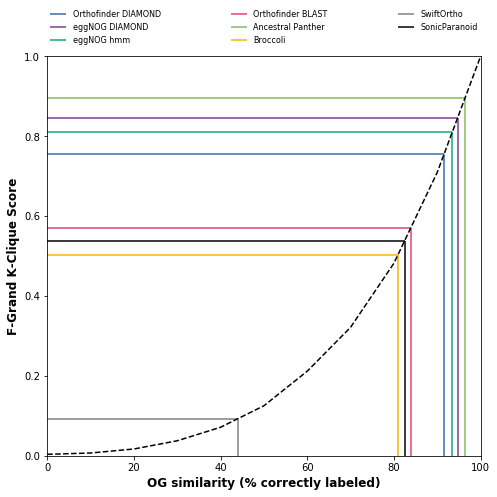

In [75]:
# Plot the randscore median
fig = plt.figure(figsize = (two_column, two_column))
# Plot the fgkc median
pcnt = list(fgkc_baseline_quantiles.columns)

# Lets invert scores as it now is per pcnt difference, but it makes more sense to plot percent similar
fgkc_scores_q25 = list(fgkc_baseline_quantiles.loc[0.25])
fgkc_scores_q50 = list(fgkc_baseline_quantiles.loc[0.50])
fgkc_scores_q75 = list(fgkc_baseline_quantiles.loc[0.75])

fgkc_scores_q25.reverse()
fgkc_scores_q50.reverse()
fgkc_scores_q75.reverse()

plt.plot(pcnt,fgkc_scores_q50, color = "black", linestyle = "--") # plot the median fgkc versus % curve
# The q25 and q75 are almost on top of the q50, so no need to show them
def plot_lines(plt, score, x, y, label):
    # plot the scores for each orthology comparisson
    y_fit = np.interp(score, x, y)
    plt.hlines(y=score, xmin=0, xmax=y_fit, color=colors[re_name_matrix[label]], label = re_name_matrix[label])
    plt.vlines(x=y_fit, ymin=0, ymax=score, color=colors[re_name_matrix[label]])


# plot the scores for each orthology comparisson
for orthology in fgrandkclique_leca_df.index:
    if orthology != "manual":
        plot_lines(plt, fgrandkclique_leca_df.loc[orthology,"F-Grand K-Clique"], fgkc_scores_q50, pcnt, label = orthology)
        #plot_lines(plt, fgrandkclique_df.loc[orthology,"F-Grand K-Clique"], f, label = orthology)

plt.yticks(size = 10)
plt.xticks([0,20,40,60,80, 100],size = 10)
plt.legend(loc = 3, ncol = 3, prop={'size': 8}, mode = 'expand', bbox_to_anchor = (0., 1.02, 1., .102),\
           borderaxespad=0., frameon = False)
plt.tight_layout()
plt.xlabel("OG similarity (% correctly labeled)", size = 12, fontweight = 'bold')
plt.ylabel('F-Grand K-Clique Score', size = 12, fontweight = 'bold')
plt.xlim(0,100)
plt.ylim(0,1)
plt.savefig("./Figures/Supplementary/F-Grand_K-Clique_vs_pcnt_mislabeled_LECA_OGs.pdf")
plt.show()